<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-наличия-дубликатов" data-toc-modified-id="Проверка-наличия-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка наличия дубликатов</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-сторонних-металлов-на-разных-этапах." data-toc-modified-id="Концентрация-сторонних-металлов-на-разных-этапах.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация сторонних металлов на разных этапах.</a></span></li><li><span><a href="#Проверка-размера-гранул-в-обучающей-и-тестовой-выборках" data-toc-modified-id="Проверка-размера-гранул-в-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка размера гранул в обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарные-концентрации-веществ-на-разных-стадиях-очистки" data-toc-modified-id="Суммарные-концентрации-веществ-на-разных-стадиях-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарные концентрации веществ на разных стадиях очистки</a></span></li><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчета-sMAPE" data-toc-modified-id="Функция-для-расчета-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для расчета sMAPE</a></span></li><li><span><a href="#Константаная-модель" data-toc-modified-id="Константаная-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Константаная модель</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-Лес" data-toc-modified-id="Случайный-Лес-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный Лес</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Определение-лучшей-модели" data-toc-modified-id="Определение-лучшей-модели-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Определение лучшей модели</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

**Задача:**
Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Необходимо использовать данные с параметрами добычи и очистки. Разбивка на обучающую и тестовую выборки уже проведена. 

Целевым признаком является эффективность обогащения - rescovery

$$ Recovery = \dfrac{C*(F-T)}{F*(C-T)}*100\% $$
где

$ C $ - доля золота в концентрате после флотации/очистки;

$ F $ - доля золота в сырье/концентрате до флотации/очистки;

$ T $ - доля золота в отвальных хвостах после флотации/очистки.

Метрикой является sMAPE - Symmetric Mean Absolute Percentage Error

Рассчитывается по формуле:

$$ sMAPE = \dfrac{1}{N}\displaystyle\sum_{i=1}^{N} \dfrac{|y_i-\widehat{y}_i|}{(|y_i|+|\widehat{y}_i|)/2}*100\% $$

где

$ y_i $ - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

$ \widehat{y}_i $ - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

$ N $ - Количество объектов в выборке.

Необходимо спрогнозировать сразу две величины: recovery после флотации и финальное recovery

Итоговое sMAPE будет расчитываться так:

$$ sMAPE_{итог} = 25\% * sMAPE_{Rougher} + 75\% * sMAPE_{Final} $$

**Цель:**
Оптимизировтаь производство, чтобы не запускать предприятие с убыточными характеристиками.

**План:**

1. Подготовка данных;
2. Проанализировать данные;
3. Построить несколько моделей;
4. Выбрать и обучить лучшую модель;
5. Проверить лучшую модель на тестовой выборке

Загрузим все необходимые библиотеки

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from skopt import BayesSearchCV

from skopt.space import Real, Categorical, Integer

import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE=12345
N_ITER = 10
CV = 5
MAX_DEPTH = 10
MAX_N_ESTIMATORS = 70
MAX_MIN_SAMPLE_LEAF = 10

## Подготовка данных

Загрузка данных

In [3]:
try:
    data_full = pd.read_csv('gold_recovery_full_new.csv')
    data_train = pd.read_csv('gold_recovery_train_new.csv')
    data_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

Изучим полный датасет с исходными данными ```gold_recovery_full_new.csv```

In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


87 фичей, видно, что кое-где есть пропуски.

По флотационной установке 11 данных по параметрам процесса нет. Есть данные по флотационным реагентам и какой-то расчетный параметр. Можно сделать вывод, что использовать данные по этой установке нет смысла.

Также можно обратить внимание на то, что данные с временем получения замера ```date``` имеют тип object.

Изучим пропуски

In [5]:
data_full.isna().sum() / 100

date                                                   0.00
final.output.concentrate_ag                            0.01
final.output.concentrate_pb                            0.01
final.output.concentrate_sol                           2.11
final.output.concentrate_au                            0.00
final.output.recovery                                  0.00
final.output.tail_ag                                   0.01
final.output.tail_pb                                   1.01
final.output.tail_sol                                  0.06
final.output.tail_au                                   0.00
primary_cleaner.input.sulfate                          0.24
primary_cleaner.input.depressant                       0.37
primary_cleaner.input.feed_size                        0.00
primary_cleaner.input.xanthate                         1.04
primary_cleaner.output.concentrate_ag                  0.00
primary_cleaner.output.concentrate_pb                  1.16
primary_cleaner.output.concentrate_sol  

Больше всего пропусков в признаке ```secondary_cleaner.output.tail_sol``` - более 17 процентов всех объектов не имеют этого признака. Остальные пропуски не превышают 5 % в своих столбцах.

Посмотрим на сами данные

In [6]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [7]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

Рассмотрим обучающую выборку.

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Пропуски в обучающем наборе

In [9]:
data_train.isna().sum() / 100

date                                                   0.00
final.output.concentrate_ag                            0.01
final.output.concentrate_pb                            0.01
final.output.concentrate_sol                           2.11
final.output.concentrate_au                            0.00
final.output.recovery                                  0.00
final.output.tail_ag                                   0.00
final.output.tail_pb                                   1.00
final.output.tail_sol                                  0.05
final.output.tail_au                                   0.00
primary_cleaner.input.sulfate                          0.20
primary_cleaner.input.depressant                       0.32
primary_cleaner.input.feed_size                        0.00
primary_cleaner.input.xanthate                         1.00
primary_cleaner.output.concentrate_ag                  0.00
primary_cleaner.output.concentrate_pb                  0.86
primary_cleaner.output.concentrate_sol  

Картина аналогична общему набору: больше всего пропусков в признаке ```secondary_cleaner.output.tail_sol```, остальные пропуски не превышают 5 % в своих столбцах.

In [10]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

В обучающей выборке, как и в датасете с полным объемом данных есть 87 столбцов. Среди них есть очевидно признаки, которые до начала процесса очистки руды знать нельзя - например продукт после каждого из этапов очистки, хвосты после этих этапов. Все эти данные становятся известны уже в ходе процесса, и эти признаки для предсказательной модели использовать не получится.

Теперь изучим тестовую выборку - это именно те признаки, которые возможно получить до самого процесса очистки, соответственно и модель должна обучаться только на этих признаках.

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Пропуски в тестовом наборе

In [12]:
data_test.isna().sum() / 100

date                                          0.00
primary_cleaner.input.sulfate                 0.04
primary_cleaner.input.depressant              0.05
primary_cleaner.input.feed_size               0.00
primary_cleaner.input.xanthate                0.04
primary_cleaner.state.floatbank8_a_air        0.00
primary_cleaner.state.floatbank8_a_level      0.00
primary_cleaner.state.floatbank8_b_air        0.00
primary_cleaner.state.floatbank8_b_level      0.00
primary_cleaner.state.floatbank8_c_air        0.00
primary_cleaner.state.floatbank8_c_level      0.00
primary_cleaner.state.floatbank8_d_air        0.00
primary_cleaner.state.floatbank8_d_level      0.00
rougher.input.feed_ag                         0.00
rougher.input.feed_pb                         0.00
rougher.input.feed_rate                       0.03
rougher.input.feed_size                       0.01
rougher.input.feed_sol                        0.21
rougher.input.feed_au                         0.00
rougher.input.floatbank10_sulfa

In [13]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

В тестовой выборке у нас есть только 53 признака. Только эти признаки и нужны будут для обучения модели. Необходимо удалить все лишние признаки из обучающей выборки. Так же видно, что кое-где есть пропуски, как и в обучающей выборке. Но их совсем немного.

Сразу заметим, что в тестовом наборе нет признака ```secondary_cleaner.output.tail_sol``` с наибольшим числом пропусков. Это сразу снимает задачу заполнения этих пропусков

Расчитаем ```recovery``` для этапа флотации на обучающем наборе с помощью формулы и сравним его с данной фичей из набора.

In [14]:
rougher_output_recovery = ((data_train['rougher.output.concentrate_au'] * 
                            (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) / 
                           (data_train['rougher.input.feed_au'] * 
                            (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))
                           ) * 100
mean_absolute_error = mae(data_train['rougher.output.recovery'], rougher_output_recovery)
mean_absolute_error

9.73512347450521e-15

MAE между расчтеным значением и значением в наборе практически отсутсвует. Но все же есть. Возможно это связано с системой хранения чисел в компьютерах или с округлением значений.

Обратим внимание на то, что у нас все еще остались данные о сырье для флотационной установки 11 на стадии флотации. Хотя видно, что параметров ```'air'``` и ```'level'``` для данной установки нет ни в одном из процессов очистки. Возможно эта установка не используется в текущем процессе, а значит этот признак можно удалить.

In [15]:
data_test = data_test.drop(['rougher.input.floatbank11_sulfate', 
                            'rougher.input.floatbank11_xanthate',], axis=1)

data_train = data_train.drop(['rougher.input.floatbank11_sulfate', 
                            'rougher.input.floatbank11_xanthate',], axis=1)

### Проверка наличия дубликатов

In [16]:
print(data_full.duplicated().sum())
print(data_full['date'].duplicated().sum())

0
0


ни полных дубликатов на задвоенных по времени замеров нет.

### Работа с пропусками

Так как пропусков немного, можно просто удалить строки с пропусками

In [17]:
data_train = data_train.dropna()
data_test = data_test.dropna()
data_full_clean = data_full.dropna().copy()

Больше пропусков нет.

## Анализ данных

### Концентрация сторонних металлов на разных этапах.

In [18]:
def plot_hist(ax, data, label, alpha, bins, density, rwidth):
    hist = ax.hist(data, label=label, alpha=alpha, bins=bins, density=density, rwidth=rwidth)
    return hist

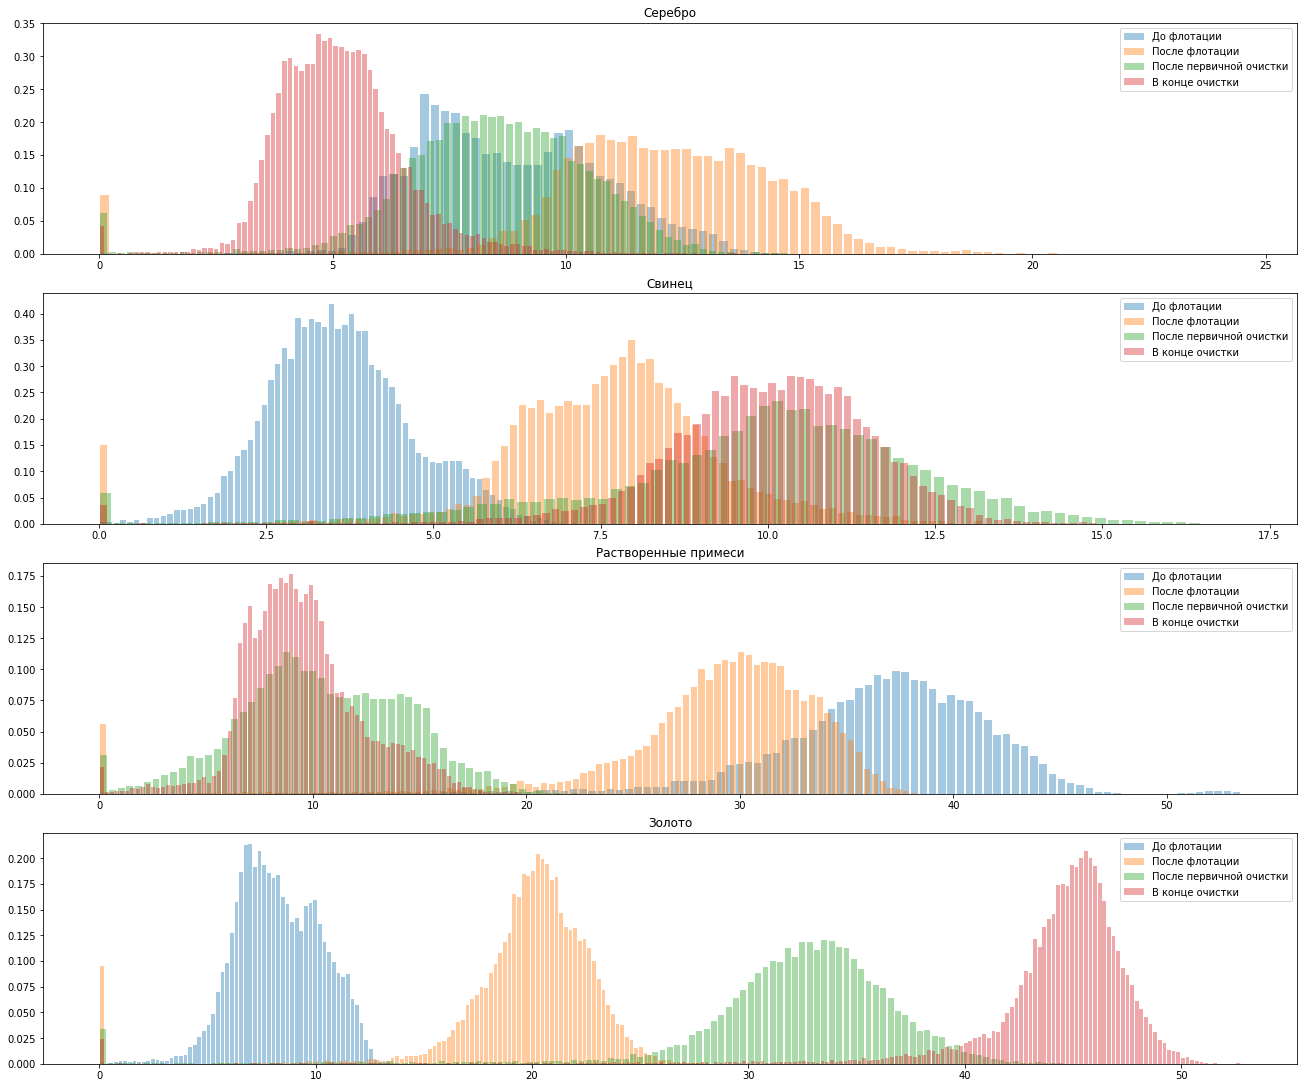

In [19]:
fig, ((ax0), (ax1), (ax2), (ax3)) = plt.subplots(nrows=4, ncols=1, figsize=(18, 15), layout='constrained')
components = ['ag', 'pb', 'sol', 'au']
plots = (ax0, ax1, ax2, ax3)
titles = ['Серебро', 'Свинец', 'Растворенные примеси', 'Золото']
hist_0 = 0
hist_1 = 0
hist_2 = 0
hist_3 = 0
hists = [hist_0, hist_1, hist_2, hist_3]
processes = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
labels = ['До флотации', 'После флотации', 'После первичной очистки', 'В конце очистки']

i = 0
alpha = 0.4
bins = 'fd'
rwidth=0.8
density=True

for component in components:
    ax = plots[i]
    j = 0
    for hist in hists:
        hist = plot_hist(ax, data_full[processes[j]+component], label=labels[j], alpha=alpha, bins=bins, density=density, rwidth=rwidth)
        j += 1
    ax.legend(labels=labels)
    ax.set_title(titles[i])
    i += 1

i = 0
j = 0

Видно, что концентрация серебра возрастает после флотации, а далее от этапа к этапу концентрация серебра снижается. Судя по всему серебро удаляется именно на первичной и вторичной очистках, а на этапе флотации не затрагивается. 

Концентрация свинца возрастает после флотации и не сильно изменяется в процессе очистки.

Растворенные примеси удаляются из сырья по большей части при флотации и первичной очистке, при вторичной очистке растворенные примеси удаляются в незначительном объеме.

Как и ожидается от процесса обогащения золота, конуентрация золота возрастает от процесса к процессу.

Также для всех компонентов на всех этапах обогащения руды заметны выбросы около нуля

### Проверка размера гранул в обучающей и тестовой выборках

Изучим размер гранул сырья в обучающей и тестовой выборках с помощью нормализованных гистограмм.

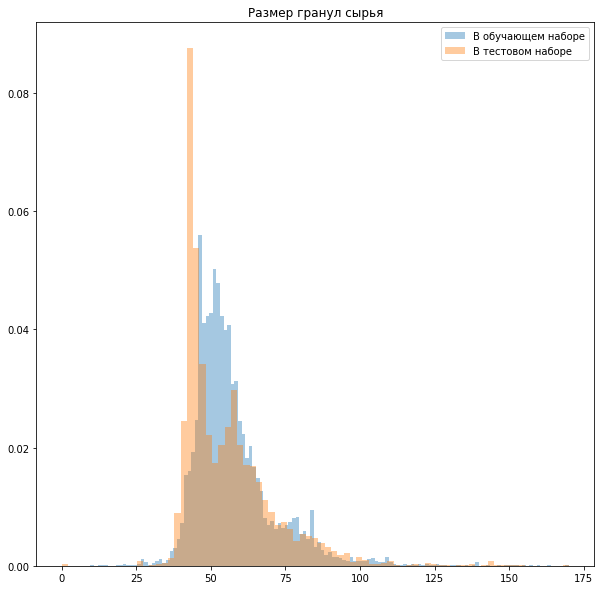

In [20]:
datasets = [data_train, data_test]
labels = ['В обучающем наборе', 'В тестовом наборе']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
i = 0

for dataset in datasets:
    ax.hist(dataset['rougher.input.feed_size'], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            range=(0, 170), 
            label=labels[i])
    i += 1
ax.legend(labels=labels)
ax.set_title('Размер гранул сырья')
plt.show()
i = 0

### Суммарные концентрации веществ на разных стадиях очистки 

C помощью гистограмм изучим суммарные концентрации веществ на разных стадиях

In [21]:
data_full_clean['rougher.input.total_concentrate'] = data_full_clean[['rougher.input.feed_ag', 
                                                                      'rougher.input.feed_au', 
                                                                      'rougher.input.feed_pb', 
                                                                      'rougher.input.feed_sol']].sum(axis=1)
data_full_clean['rougher.output.total_concentrate'] = data_full_clean[['rougher.output.concentrate_ag', 
                                                                       'rougher.output.concentrate_au', 
                                                                       'rougher.output.concentrate_pb', 
                                                                       'rougher.output.concentrate_sol']].sum(axis=1)
data_full_clean['final.output.total_concentrate'] = data_full_clean[['final.output.concentrate_ag', 
                                                                     'final.output.concentrate_au', 
                                                                     'final.output.concentrate_pb', 
                                                                     'final.output.concentrate_sol']].sum(axis=1)


In [22]:
data_full_clean = data_full_clean.set_index(data_full_clean['date'], drop=True)

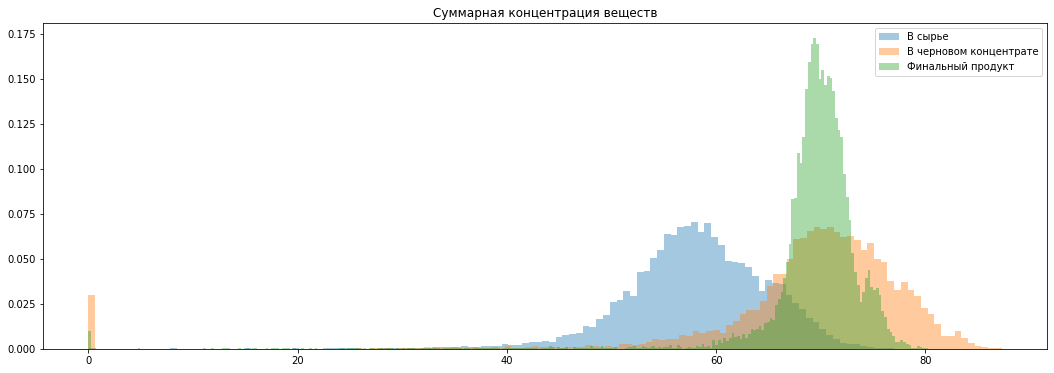

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
total_conc = ['rougher.input.total_concentrate',
              'rougher.output.total_concentrate',
              'final.output.total_concentrate']

labels = ['В сырье',
         'В черновом концентрате',
         'Финальный продукт']
i = 0

for conc in total_conc:
    ax.hist(data_full_clean[conc], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            label=labels[i])
    i += 1
ax.set_title('Суммарная концентрация веществ')
ax.legend(labels=labels)
plt.show()

i = 0

Видно, что в сырье суммарная крнцентрация веществ собрана в районе значений 55-65, после флотации (в черновом концентрате) суммарная концентрация сместилась к значениям 65-75, но все еще остается большой разброс в данных - встречаются случаи с суммарной концентрацией веществ, как и в сырье. Картина ощутимо менятеся для финального продукта - суммарный концентрации довольно кучно собраны в районе значения 70.

Из аномальных значений - заметно много знчений в районе 0. Это странные значения, лучше от таких строк избавиться. Как и в целом от редких значений, менее 40.

In [24]:
anomaly_index_final = list(data_full_clean.loc[data_full_clean['final.output.total_concentrate'] <= 38].index)
anomaly_index_r_output = list(data_full_clean.loc[data_full_clean['rougher.output.total_concentrate'] <= 38].index)
anomaly_index_r_input = list(data_full_clean.loc[data_full_clean['rougher.input.total_concentrate'] <= 38].index)
anomaly_index = []
anomaly_index.extend(anomaly_index_final)
anomaly_index.extend(anomaly_index_r_output)
anomaly_index.extend(anomaly_index_r_input)
data_full_clean = data_full_clean.loc[data_full_clean['final.output.total_concentrate'] > 38]
data_full_clean = data_full_clean.loc[data_full_clean['rougher.output.total_concentrate'] > 38]
data_full_clean = data_full_clean.loc[data_full_clean['rougher.input.total_concentrate'] > 38]

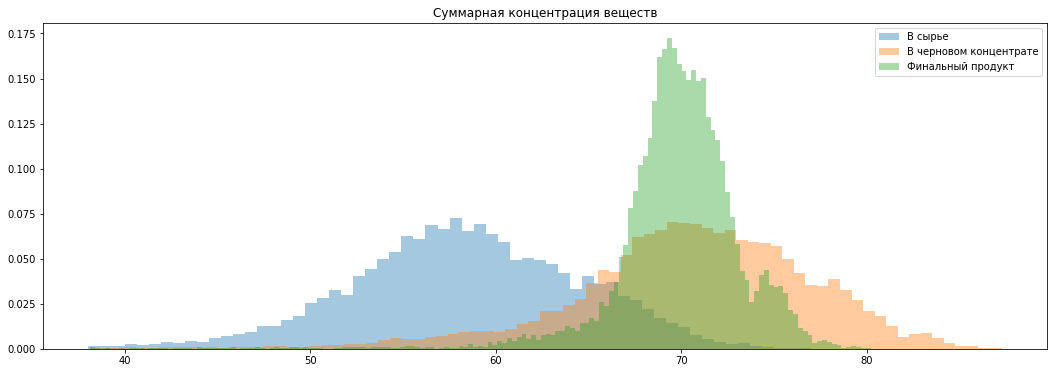

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

i = 0

for conc in total_conc:
    ax.hist(data_full_clean[conc], 
            density=density, 
            bins=bins, 
            alpha=alpha, 
            label=labels[i])
    i += 1
ax.set_title('Суммарная концентрация веществ')
ax.legend(labels=labels)
plt.show()

i = 0

Тепеперь в данных нет измерений "пустого" сырья

###  Разобьем данные на выборки

Оставим в обучающем наборе только необходимые признаки

In [26]:
data_train.shape

(11341, 85)

Удалим из обучающего набора все ненужные признаки и строки с аномальными значениями, которые мы определили на предыдущем этапе.

In [27]:
test_features_list = list(data_test.columns)
test_features_list.extend(['final.output.recovery', 'rougher.output.recovery'])  #запишем признаки из тестовой выборки и целевой признак (пока один)
train_features_list = list(data_train.columns)  #запишем все признаки из обучающей выборки


for feature in train_features_list:
    if feature not in test_features_list:                 #отбросим те признаки, которых нет в тестовой выборке,
        data_train = data_train.drop(feature, axis=1)     #за исключением целевого

data_train = data_train.set_index(data_train['date'])
data_train = data_train.drop(anomaly_index, errors='ignore')
data_train = data_train.reset_index(drop=True)
data_train = data_train.drop('date', axis=1)
data_train.shape

(10903, 52)

Данные в наборах шли по-порядку, такое расположение данных не помогает обучению модели. Поэтому перед работой с моделями перемешаем наши данные.

In [28]:
data_train = data_train.sample(frac=1, random_state=12345).reset_index(drop=True)

Необходимо разделить обучающий набор на набор признаков и целевой признак для флотации и для очистки. В итоге получится 4 набора, необходимых для обучения моделей. 2 - для флотации, 2 - для очистки.

In [29]:
all_features_train = data_train.columns  #все необходимые признаки
rougher_data_train = data_train.copy()  #тут будут признаки для процесса флотации
cleaner_data_train = data_train.copy()  #тут будут признаки для остального процесса очистки
for feature in all_features_train:
    if 'roug' not in feature:
        rougher_data_train = rougher_data_train.drop(feature, axis=1)  #отбрасываем все признаки не отсносящиеся к флотации
    if 'clean' not in feature and 'recov' not in feature:
        cleaner_data_train = cleaner_data_train.drop(feature, axis=1)  #отбрасываем все признаки относящиеся к флотации за исключением recovery

features_train_rougher = rougher_data_train.drop(['rougher.output.recovery'], axis=1).copy()
target_train_rougher = rougher_data_train['rougher.output.recovery'].copy()
features_train_cleaner = cleaner_data_train.drop(['final.output.recovery'], axis=1).copy()
target_train_cleaner = cleaner_data_train['final.output.recovery'].copy()
print(features_train_rougher.shape, target_train_rougher.shape)
print(features_train_cleaner.shape, target_train_cleaner.shape)

(10903, 20) (10903,)
(10903, 31) (10903,)


Тестовый набор достался нам без целевого признака, необходимо его добавить. И удалить строки с аномальными значениями.

In [30]:
data_test.shape

(5250, 51)

In [31]:
data_test = data_test.set_index(data_test['date'], drop=True)
data_test = data_test.join(data_full_clean['final.output.recovery'])
data_test = data_test.join(data_full_clean['rougher.output.recovery'])
data_test = data_test.reindex(columns=['date',
                                       'final.output.recovery', 
                                       'primary_cleaner.input.sulfate',
                                       'primary_cleaner.input.depressant',
                                       'primary_cleaner.input.feed_size',
                                       'primary_cleaner.input.xanthate', 
                                       'primary_cleaner.state.floatbank8_a_air',
                                       'primary_cleaner.state.floatbank8_a_level',
                                       'primary_cleaner.state.floatbank8_b_air', 
                                       'primary_cleaner.state.floatbank8_b_level',
                                       'primary_cleaner.state.floatbank8_c_air',
                                       'primary_cleaner.state.floatbank8_c_level',
                                       'primary_cleaner.state.floatbank8_d_air',
                                       'primary_cleaner.state.floatbank8_d_level',
                                       'rougher.input.feed_ag',
                                       'rougher.input.feed_pb',
                                       'rougher.input.feed_rate',
                                       'rougher.input.feed_size',
                                       'rougher.input.feed_sol',
                                       'rougher.input.feed_au',
                                       'rougher.input.floatbank10_sulfate',
                                       'rougher.input.floatbank10_xanthate',
                                       'rougher.output.recovery',
                                       'rougher.state.floatbank10_a_air',
                                       'rougher.state.floatbank10_a_level',
                                       'rougher.state.floatbank10_b_air',
                                       'rougher.state.floatbank10_b_level',
                                       'rougher.state.floatbank10_c_air',
                                       'rougher.state.floatbank10_c_level',
                                       'rougher.state.floatbank10_d_air',
                                       'rougher.state.floatbank10_d_level',
                                       'rougher.state.floatbank10_e_air',
                                       'rougher.state.floatbank10_e_level',
                                       'rougher.state.floatbank10_f_air',
                                       'rougher.state.floatbank10_f_level',
                                       'secondary_cleaner.state.floatbank2_a_air',
                                       'secondary_cleaner.state.floatbank2_a_level',
                                       'secondary_cleaner.state.floatbank2_b_air',
                                       'secondary_cleaner.state.floatbank2_b_level',
                                       'secondary_cleaner.state.floatbank3_a_air',
                                       'secondary_cleaner.state.floatbank3_a_level',
                                       'secondary_cleaner.state.floatbank3_b_air',
                                       'secondary_cleaner.state.floatbank3_b_level',
                                       'secondary_cleaner.state.floatbank4_a_air',
                                       'secondary_cleaner.state.floatbank4_a_level',
                                       'secondary_cleaner.state.floatbank4_b_air',
                                       'secondary_cleaner.state.floatbank4_b_level',
                                       'secondary_cleaner.state.floatbank5_a_air',
                                       'secondary_cleaner.state.floatbank5_a_level',
                                       'secondary_cleaner.state.floatbank5_b_air',
                                       'secondary_cleaner.state.floatbank5_b_level',
                                       'secondary_cleaner.state.floatbank6_a_air',
                                       'secondary_cleaner.state.floatbank6_a_level'])
data_test = data_test.drop(anomaly_index, errors='ignore')
data_test = data_test.reset_index(drop=True)
data_test = data_test.drop('date', axis=1)
data_test.shape

(5070, 52)

In [32]:
data_test = data_test.sample(frac=1, random_state=12345).reset_index(drop=True)

Точно также разделим тестовый набор на 2 набора для флотации (признаки и целевой признак) и 2 набора для очистки.

In [33]:
all_features_test = data_test.columns  #все необходимые признаки
rougher_data_test = data_test.copy()  #тут будут признаки для процесса флотации
cleaner_data_test = data_test.copy()  #тут будут признаки для остального процесса очистки
for feature in all_features_test:
    if 'roug' not in feature:
        rougher_data_test = rougher_data_test.drop(feature, axis=1)  #отбрасываем все признаки не отсносящиеся к флотации
    if 'clean' not in feature and 'recov' not in feature:
        cleaner_data_test = cleaner_data_test.drop(feature, axis=1)  #отбрасываем все признаки относящиеся к флотации за исключением recovery

features_test_rougher = rougher_data_test.drop(['rougher.output.recovery'], axis=1).copy()
target_test_rougher = rougher_data_test['rougher.output.recovery'].copy()
features_test_cleaner = cleaner_data_test.drop(['final.output.recovery'], axis=1).copy()
target_test_cleaner = cleaner_data_test['final.output.recovery'].copy()
print(features_test_rougher.shape, target_test_rougher.shape)
print(features_test_cleaner.shape, target_test_cleaner.shape)

(5070, 20) (5070,)
(5070, 31) (5070,)


## Модель

### Функция для расчета sMAPE

In [34]:
def sMAPE(target, predictions):
    predictions = pd.Series(predictions).reset_index(drop=True)
    target = pd.Series(target).reset_index(drop=True)
    step_1 = (target - predictions).abs()
    step_2 = (target.abs() + predictions.abs())/2
    smape = (step_1 / step_2).mean() * 100
    return smape

smape_score = make_scorer(sMAPE, greater_is_better=False)

def cv_smape(model, cv, features, target):
    cv_results = cross_val_score(model, 
                                 features, 
                                 target, 
                                 cv=cv, 
                                 scoring=smape_score,
                                 n_jobs=-1)
    smape = abs(sum(cv_results) / len(cv_results))
    return smape

In [35]:
i = 0
def new_row(table, data, i):
    row_lin = pd.DataFrame(data=[data], columns=table.columns)
    table.loc[i, :] = row_lin.loc[0, :]
    display(table)
    i = i + 1
    return table, i

In [36]:
def best_models(features_train, target_train, model, params, random_state, n_iter, cv, scoring, verbose):
    clf_rougher = BayesSearchCV(model,
                                search_spaces=params,
                                random_state=random_state,
                                n_iter=n_iter,
                                cv=cv,
                                scoring=scoring,
                                verbose=verbose,
                                n_jobs=-1)
    clf_rougher_search = clf_rougher.fit(features_train, target_train)
    best_score = clf_rougher_search.best_score_
    best_params = clf_rougher_search.best_params_
    best_model = clf_rougher_search.best_estimator_
    print('Лучшие гипперпараметры: ', best_params)
    print('sMAPE:', best_score)
    return best_model, best_params, best_score

In [37]:
models = pd.DataFrame(columns=['name', 
                               'rougher_best_params',
                               'sMAPE_rougher', 
                               'cleaner_best_params',
                               'sMAPE_cleaner', 
                               'total_SMAPE'
                              ])

### Константаная модель

In [38]:
predictions_rougher = pd.Series(target_train_rougher.mean(), index=target_train_rougher.index)
smape_rougher_const = sMAPE(target_train_rougher, predictions_rougher)

predictions_cleaner = pd.Series(target_train_cleaner.mean(), index=target_train_cleaner.index)
smape_cleaner_const = sMAPE(target_train_cleaner, predictions_cleaner)

smape_const = 0.25 * smape_rougher_const + 0.75 * smape_cleaner_const

print(smape_const)

8.519029872289234


In [39]:
models, i = new_row(models, 
                    ['const', 
                     None, 
                     smape_rougher_const, 
                     None, 
                     smape_cleaner_const, 
                     smape_const],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,7.100552,None,8.991856,8.51903


Константная модель с предскзанием среднего значения для всех объектов показывает значение sMAPE в 9.07%.

### Линейная регрессия

In [40]:
model_rougher_1 = LinearRegression()
smape_rougher_1 = cv_smape(model_rougher_1, CV, features_train_rougher, target_train_rougher)

model_rougher_1.fit(features_train_rougher, target_train_rougher)
features_train_cleaner['rougher.output.recovery'] = model_rougher_1.predict(features_train_rougher)

model_cleaner_1 = LinearRegression()
model_cleaner_1.fit(features_train_cleaner, target_train_cleaner)
smape_cleaner_1 = cv_smape(model_cleaner_1, CV, features_train_cleaner, target_train_cleaner)
smape_1 = 0.25 * smape_rougher_1 + 0.75 * smape_cleaner_1
print(smape_1)

6.581869500986664


Линейная модель показала результат гораздо лучше.

In [41]:
models, i = new_row(models, 
                    ['lin', 
                     None, 
                     smape_rougher_1, 
                     None, 
                     smape_cleaner_1, 
                     smape_1],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,7.100552,None,8.991856,8.51903
1,lin,None,4.901257,None,7.142074,6.58187


### Дерево решений

In [42]:
params_2 = {'max_depth' : Integer(1, MAX_DEPTH, 'log-uniform'),
            'criterion' : Categorical(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
            'min_samples_leaf' : Integer(1, MAX_MIN_SAMPLE_LEAF, 'log-uniform')
           }
model_rougher_2 = DecisionTreeRegressor(random_state=RANDOM_STATE)
best_model_rougher_2, best_params_rougher_2, best_score_rougher_2 = best_models(features_train_rougher,
                                                                                target_train_rougher,
                                                                                model_rougher_2,
                                                                                params_2,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20
                                                                               )
features_train_cleaner['rougher.output.recovery'] = best_model_rougher_2.predict(features_train_rougher)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4)])
sMAPE: -3.77377309087147


In [43]:
model_cleaner_2 = DecisionTreeRegressor(random_state=RANDOM_STATE)
best_model_cleaner_2, best_params_cleaner_2, best_score_cleaner_2 = best_models(features_train_cleaner,
                                                                                 target_train_cleaner,
                                                                                 model_cleaner_2,
                                                                                 params_2,
                                                                                 RANDOM_STATE,
                                                                                 N_ITER,
                                                                                 CV,
                                                                                 smape_score,
                                                                                 20
                                                                                )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4)])
sMAPE: -6.235849958912015


In [44]:
smape_2 = abs(0.25 * best_score_rougher_2 + 0.75 * best_score_cleaner_2)

print(f'Итоговый sMAPE для модели дерева: {smape_2}')

Итоговый sMAPE для модели дерева: 5.620330741901879


In [45]:
models, i = new_row(models, 
                    ['tree', 
                     best_params_rougher_2, 
                     best_score_rougher_2, 
                     best_params_cleaner_2, 
                     best_score_cleaner_2, 
                     smape_2],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,7.100552,None,8.991856,8.51903
1,lin,None,4.901257,None,7.142074,6.58187
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.773773,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-6.23585,5.620331


### Случайный Лес

In [46]:
params_3 = {'max_depth' : Integer(1, MAX_DEPTH, 'log-uniform'),
            'n_estimators' : Integer(1, MAX_N_ESTIMATORS, 'log-uniform'),
            'criterion' : Categorical(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
            'min_samples_leaf' : Integer(1, MAX_MIN_SAMPLE_LEAF, 'log-uniform')
           }
model_rougher_3 = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

best_model_rougher_3, best_params_rougher_3, best_score_rougher_3 = best_models(features_train_rougher,
                                                                                target_train_rougher,
                                                                                model_rougher_3,
                                                                                params_3,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20
                                                                               )

features_train_cleaner['rougher.output.recovery'] = best_model_rougher_3.predict(features_train_rougher)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4), ('n_estimators', 5)])
sMAPE: -3.3862202890777082


In [47]:
model_cleaner_3 = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

best_model_cleaner_3, best_params_cleaner_3, best_score_cleaner_3 = best_models(features_train_cleaner,
                                                                                 target_train_cleaner,
                                                                                 model_cleaner_3,
                                                                                 params_3,
                                                                                 RANDOM_STATE,
                                                                                 N_ITER,
                                                                                 CV,
                                                                                 smape_score,
                                                                                 20
                                                                                )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие гипперпараметры:  OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_samples_leaf', 4), ('n_estimators', 5)])
sMAPE: -5.711099756167176


In [48]:
smape_3 = abs(0.25 * best_score_rougher_3 + 0.75 * best_score_cleaner_3)

print(f'Итоговый sMAPE для модели леса: {smape_3}')

Итоговый sMAPE для модели леса: 5.129879889394809


Случайный лес показал наилучший резльтут.

In [49]:
models, i = new_row(models, 
                    ['forest', 
                     best_params_rougher_3, 
                     best_score_rougher_3, 
                     best_params_cleaner_3, 
                     best_score_cleaner_3, 
                     smape_3],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,7.100552,None,8.991856,8.51903
1,lin,None,4.901257,None,7.142074,6.58187
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.773773,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-6.23585,5.620331
3,forest,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.38622,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.7111,5.12988


### LGBM

In [68]:
model_rougher_4 = LGBMRegressor(random_state=RANDOM_STATE, 
                                n_jobs=-1, 
                                deterministic=True, 
                                bagging_freq=1)

params_4 = {'max_depth' : Integer(1, MAX_DEPTH, 'log-uniform'),
            'n_estimators' : Integer(500, 3000, 'log-uniform')
           }

best_model_rougher_4, best_params_rougher_4, best_score_rougher_4 = best_models(features_train_rougher,
                                                                                target_train_rougher,
                                                                                model_rougher_4,
                                                                                params_4,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20
                                                                               )

features_train_cleaner['rougher.output.recovery'] = best_model_rougher_4.predict(features_train_rougher)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Лучшие гипперпараметры:  OrderedDict([('max_depth', 9), ('n_estimators', 1387)])
sMAPE: -3.0296497931796598


In [69]:
model_cleaner_4 = LGBMRegressor(random_state=RANDOM_STATE, 
                                n_jobs=-1, 
                                deterministic=True, 
                                bagging_freq=1)

best_model_cleaner_4, best_params_cleaner_4, best_score_cleaner_4 = best_models(features_train_cleaner,
                                                                                target_train_cleaner,
                                                                                model_cleaner_4,
                                                                                params_4,
                                                                                RANDOM_STATE,
                                                                                N_ITER,
                                                                                CV,
                                                                                smape_score,
                                                                                20
                                                                               )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Лучшие гипперпараметры:  OrderedDict([('max_depth', 9), ('n_estimators', 1387)])
sMAPE: -4.68207876336039


In [70]:
smape_4 = abs(0.25 * best_score_rougher_4 + 0.75 * best_score_cleaner_4)

print(f'Итоговый sMAPE для модели леса: {smape_4}')

Итоговый sMAPE для модели леса: 4.268971520815207


In [53]:
models, i = new_row(models, 
                    ['LGBM', 
                     best_params_rougher_4, 
                     best_score_rougher_4, 
                     best_params_cleaner_4, 
                     best_score_cleaner_4, 
                     smape_4],
                   i)

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
0,const,None,7.100552,None,8.991856,8.51903
1,lin,None,4.901257,None,7.142074,6.58187
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.773773,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-6.23585,5.620331
3,forest,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.38622,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.7111,5.12988
4,LGBM,"{'max_depth': 9, 'n_estimators': 1387}",-3.02965,"{'max_depth': 9, 'n_estimators': 1387}",-4.682079,4.268972


### Определение лучшей модели

Отсортируем модели по увеличение итогового sMAPE.

In [54]:
models.sort_values(by='total_SMAPE')

,name,rougher_best_params,sMAPE_rougher,cleaner_best_params,sMAPE_cleaner,total_SMAPE
4,LGBM,"{'max_depth': 9, 'n_estimators': 1387}",-3.02965,"{'max_depth': 9, 'n_estimators': 1387}",-4.682079,4.268972
3,forest,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.38622,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-5.7111,5.12988
2,tree,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-3.773773,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-6.23585,5.620331
1,lin,None,4.901257,None,7.142074,6.58187
0,const,None,7.100552,None,8.991856,8.51903


### Проверка модели на тестовой выборке

Проверим, какое sMAPE покажет лучшая модель на тестовом наборе данных.

In [71]:
best_model_rougher = best_model_rougher_4
best_model_cleaner = best_model_cleaner_4

smape_rougher = sMAPE(target_test_rougher, best_model_rougher.predict(features_test_rougher))

features_test_cleaner['rougher.output.recovery'] = best_model_rougher.predict(features_test_rougher)

smape_cleaner = sMAPE(target_test_cleaner, best_model_cleaner.predict(features_test_cleaner))

print(smape_rougher * 0.25 + smape_cleaner * 0.75)

6.887637426183917


В итоге на лучшей модели (случайный лес) для тестовой модели была получена метрика sMAPE в 7.05.

## Общий вывод

1. В ходе проведенной работы были исследованы данные о процессе обогащения золотой руды.

2. В соответствии с этими данными можно сделать вывод, что серебро в ходе очистки удаляется, а вот концентрация свинца только возрастает, видимо от него сырье не очищается или очищается совсем назначительно. Тем не менее концентрация золота планомерно растет от этапа к этапу
В данных имелись пропуски, вызванные вероятно ошибками при выгрузке данных или сбоями при их сборе.
Имелись аномальные значения: на некоторых этапах суммарная концентрация веществ была равна 0, что довольно странно. От таких объектов пришлось избавиться.
Концентрация золота, как и ожидалось, от процесса к процессу увеличивается,остальные примеси удаляются на разных этапах обогащения.

3. Предложенные обучающий и тестовый наборы можно применять для обучения и тестирования моделей, так как эти выборки сопоставимы.

4. Были обучены 3 регрессионные модели: линейная регрессия, дерево решений и случайный лес, с помощью кроссвалидации найдены наилучшие параметры. Лучшей оказалась модель случайного леса. Средняя sMAPE показала значение в 5.42 на обучающей выборке.

5. Проверка на тестовой выборке показало sMAPE в 7.05. Видно, что модель переобучилась.